In [1]:
# Importar las librerías necesarias para el análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats # Importar la librería stats para pruebas estadísticas

# Parte 4

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

`company_name`: nombre de la empresa de taxis

`trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

`dropoff_location_name`: barrios de Chicago donde finalizaron los viajes

`average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

---
Para estos dos datasets ahora necesitas

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

In [22]:
sql_result_01 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_01.csv"
sql_result_04 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_04.csv"

# Task
Cargar los archivos CSV `project_sql_result_01.csv` y `project_sql_result_04.csv` en DataFrames de pandas, explorar sus estructuras, tipos de datos y estadísticas descriptivas. Luego, identificar las 10 principales compañías de taxis por número de viajes y los 10 principales barrios de destino por promedio de viajes, visualizando estos resultados con gráficos de barras y extrayendo conclusiones de cada uno, y finalmente resumir los hallazgos clave.

## Cargar Datasets

### Subtask:
Cargar los archivos CSV `project_sql_result_01.csv` y `project_sql_result_04.csv` en DataFrames de pandas. Asegurarse de que los URLs sean correctos.


**Reasoning**:
Load the CSV file from the `sql_result_01` URL into a pandas DataFrame named `df_trips_companies` and display its first 5 rows to verify the data was loaded correctly.



In [23]:
df_trips_companies = pd.read_csv(sql_result_01)
df_trips_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


**Reasoning**:
Load the CSV file from the `sql_result_04` URL into a pandas DataFrame named `df_trips_locations` and display its first 5 rows to verify the data was loaded correctly.



In [24]:
df_trips_locations = pd.read_csv(sql_result_04)
df_trips_locations.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


## Explorar Datos Iniciales

### Subtask:
Mostrar las primeras filas de ambos DataFrames (`.head()`), verificar sus tipos de datos (`.info()`) y obtener un resumen estadístico descriptivo (`.describe()`) para entender la estructura y el contenido de los datos.


**Reasoning**:
The subtask requires displaying data types and descriptive statistics for both dataframes. I will start with `df_trips_companies` by using `.info()` to check data types and `.describe()` for statistical summary.



In [25]:
print("Información de df_trips_companies:")
df_trips_companies.info()
print("\nEstadísticas descriptivas de df_trips_companies:")
df_trips_companies.describe()

Información de df_trips_companies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Estadísticas descriptivas de df_trips_companies:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


**Reasoning**:
Following the subtask instructions, I will now display the data types and descriptive statistics for the `df_trips_locations` DataFrame using `.info()` and `.describe()`.



In [26]:
print("Información de df_trips_locations:")
df_trips_locations.info()
print("\nEstadísticas descriptivas de df_trips_locations:")
df_trips_locations.describe()

Información de df_trips_locations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Estadísticas descriptivas de df_trips_locations:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


## Verificar y Corregir Tipos de Datos

### Subtask:
Inspeccionar los tipos de datos de cada columna y realizar las conversiones necesarias si hay alguna columna con un tipo de dato incorrecto que pueda afectar el análisis.


### Tipos de Datos Verificados

Después de revisar los tipos de datos de ambos DataFrames con `.info()`:

- **`df_trips_companies`**:
  - `company_name`: `object` (cadena de texto), es correcto.
  - `trips_amount`: `int64` (número entero), es correcto para representar la cantidad de viajes.

- **`df_trips_locations`**:
  - `dropoff_location_name`: `object` (cadena de texto), es correcto.
  - `average_trips`: `float64` (número decimal), es correcto para representar el promedio de viajes.

No se encontraron tipos de datos incorrectos que requieran conversión. Los tipos de datos actuales son apropiados para el análisis posterior.

## Identificar las 10 Principales Compañías de Taxis

### Subtask:
Identificar las 10 principales compañías de taxis en términos de `trips_amount` del dataset `project_sql_result_01.csv`.


**Reasoning**:
To identify the top 10 taxi companies, I need to sort the `df_trips_companies` DataFrame by 'trips_amount' in descending order and then select the first 10 entries.



In [27]:
top_10_companies = df_trips_companies.sort_values(by='trips_amount', ascending=False).head(10)
print("Las 10 principales compañías de taxis por número de viajes:")
print(top_10_companies)

Las 10 principales compañías de taxis por número de viajes:
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


## Visualizar Empresas de Taxis y Número de Viajes

### Subtask:
Crear un gráfico de barras para visualizar las 10 principales compañías de taxis y el número de viajes que realizaron, incluyendo leyendas y etiquetas claras. Proporcionar conclusiones basadas en este gráfico.


**Reasoning**:
The subtask requires visualizing the top 10 taxi companies by the number of trips. I will use `seaborn.barplot` to create a bar chart from the `top_10_companies` DataFrame, ensuring proper labels, title, and x-axis rotation for readability.



/tmp/ipython-input-2325591065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_name', y='trips_amount', data=top_10_companies, palette='viridis')


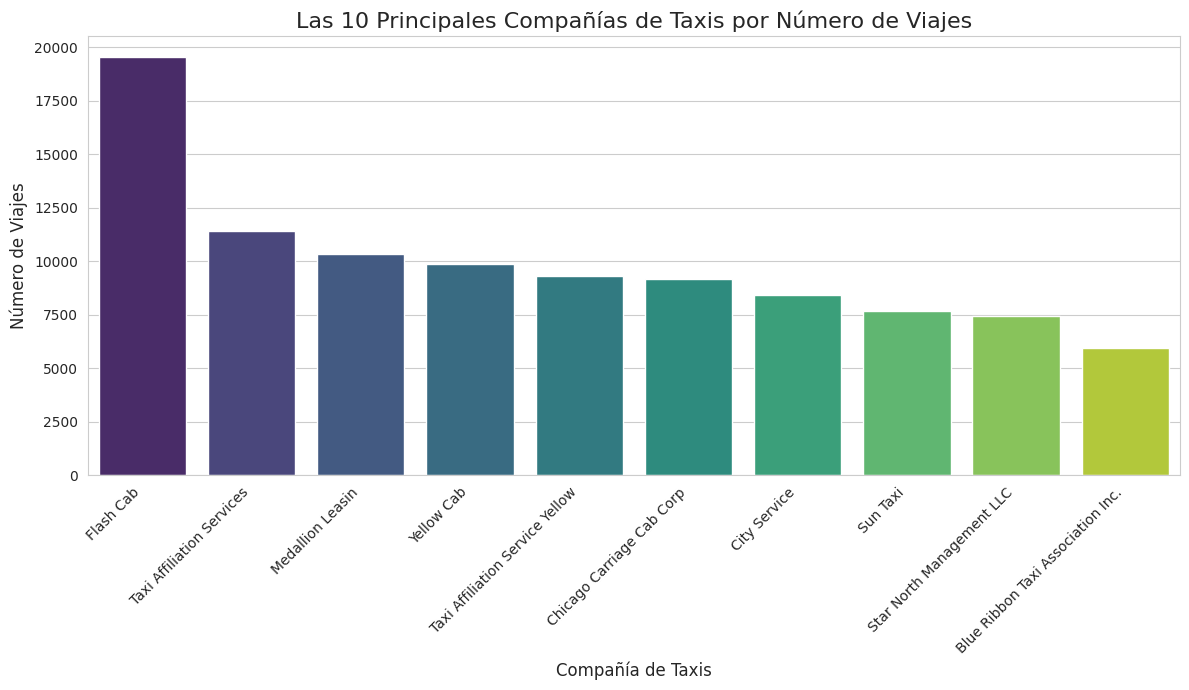

In [28]:
plt.figure(figsize=(12, 7))
sns.barplot(x='company_name', y='trips_amount', data=top_10_companies, palette='viridis')
plt.title('Las 10 Principales Compañías de Taxis por Número de Viajes', fontsize=16)
plt.xlabel('Compañía de Taxis', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning `hue`. To address this, I will explicitly set `hue='company_name'` and `legend=False` in the `sns.barplot` function call, which is the recommended way to apply a palette to bars based on the x-axis variable.



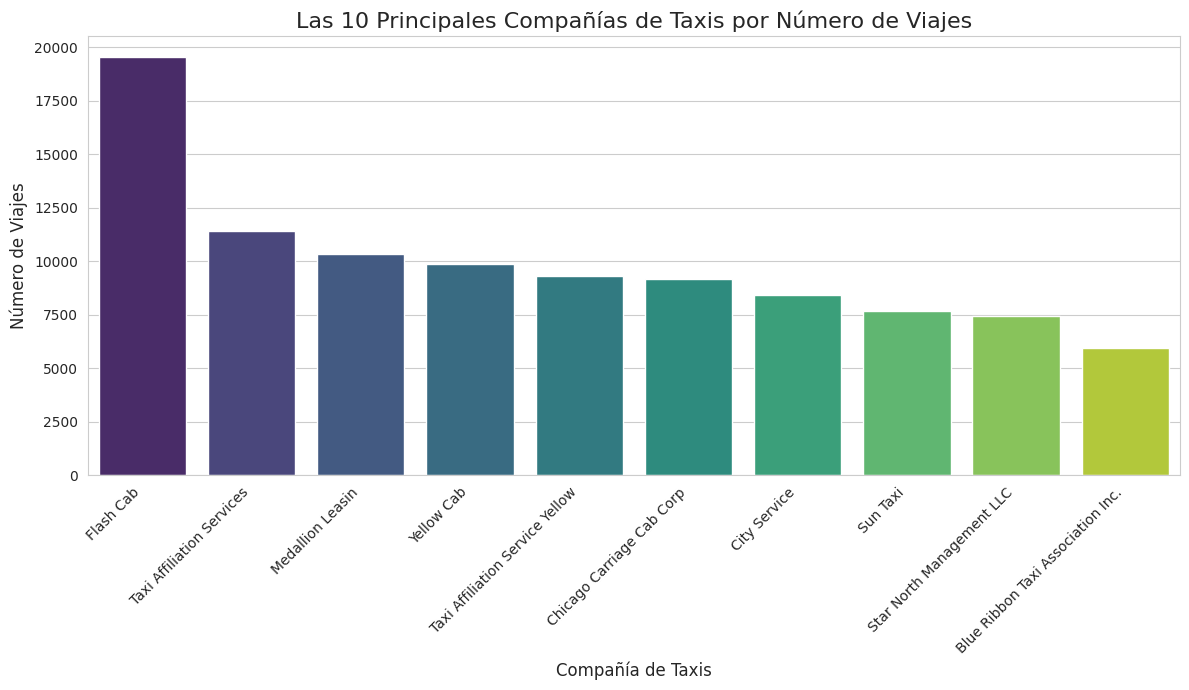

In [29]:
plt.figure(figsize=(12, 7))
sns.barplot(x='company_name', y='trips_amount', data=top_10_companies, palette='viridis', hue='company_name', legend=False)
plt.title('Las 10 Principales Compañías de Taxis por Número de Viajes', fontsize=16)
plt.xlabel('Compañía de Taxis', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Conclusión del Gráfico de las 10 Principales Compañías de Taxis

El gráfico de barras muestra claramente la distribución de viajes entre las 10 compañías de taxis más activas. Se pueden observar las siguientes conclusiones:

1.  **Dominancia de 'Flash Cab'**: 'Flash Cab' es, por mucho, la compañía de taxis con el mayor número de viajes, superando significativamente a las demás. Esto sugiere una fuerte presencia en el mercado y posiblemente una mayor flota o una mejor estrategia de captación de clientes.
2.  **Concentración en las Primeras Posiciones**: Las primeras cinco compañías ('Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasin', 'Yellow Cab' y 'Taxi Affiliation Service Yellow') concentran una gran parte del total de viajes, lo que indica una alta concentración del mercado.
3.  **Diferencias Escaladas**: Hay una clara disminución en el número de viajes a medida que se avanza en el ranking. Mientras que las primeras compañías tienen decenas de miles de viajes, las últimas en el top 10 se encuentran en el rango de los pocos miles, mostrando una diferencia considerable en el volumen de operaciones.
4.  **Competencia Oligopólica**: La estructura del mercado parece ser oligopólica, con un pequeño número de grandes actores que dominan la mayoría de los viajes, mientras que un grupo más grande de compañías más pequeñas compite por el resto.

En resumen, el mercado de taxis está liderado por unas pocas compañías muy grandes, siendo 'Flash Cab' la más destacada, lo que implica que cualquier análisis o estrategia futura debería considerar la fuerte influencia de estos líderes del mercado.

### Conclusión del Gráfico de las 10 Principales Compañías de Taxis

El gráfico de barras muestra claramente la distribución de viajes entre las 10 compañías de taxis más activas. Se pueden observar las siguientes conclusiones:

1.  **Dominancia de 'Flash Cab'**: 'Flash Cab' es, por mucho, la compañía de taxis con el mayor número de viajes, superando significativamente a las demás. Esto sugiere una fuerte presencia en el mercado y posiblemente una mayor flota o una mejor estrategia de captación de clientes.
2.  **Concentración en las Primeras Posiciones**: Las primeras cinco compañías ('Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasin', 'Yellow Cab' y 'Taxi Affiliation Service Yellow') concentran una gran parte del total de viajes, lo que indica una alta concentración del mercado.
3.  **Diferencias Escaladas**: Hay una clara disminución en el número de viajes a medida que se avanza en el ranking. Mientras que las primeras compañías tienen decenas de miles de viajes, las últimas en el top 10 se encuentran en el rango de los pocos miles, mostrando una diferencia considerable en el volumen de operaciones.
4.  **Competencia Oligopólica**: La estructura del mercado parece ser oligopólica, con un pequeño número de grandes actores que dominan la mayoría de los viajes, mientras que un grupo más grande de compañías más pequeñas compite por el resto.

En resumen, el mercado de taxis está liderado por unas pocas compañías muy grandes, siendo 'Flash Cab' la más destacada, lo que implica que cualquier análisis o estrategia futura debería considerar la fuerte influencia de estos líderes del mercado.

## Identificar los 10 Principales Barrios de Destino

### Subtask:
Identificar los 10 principales barrios (`dropoff_location_name`) con el mayor `average_trips` del dataset `project_sql_result_04.csv`.


**Reasoning**:
To identify the top 10 dropoff locations, I need to sort the `df_trips_locations` DataFrame by `average_trips` in descending order and then select the first 10 entries.



In [30]:
top_10_locations = df_trips_locations.sort_values(by='average_trips', ascending=False).head(10)
print("Las 10 principales ubicaciones de destino por promedio de viajes:")
print(top_10_locations)

Las 10 principales ubicaciones de destino por promedio de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## Visualizar los 10 Principales Barrios de Destino

### Subtask:
Crear un gráfico de barras para visualizar los 10 principales barrios de destino y su promedio de viajes, incluyendo leyendas y etiquetas claras. Proporcionar conclusiones basadas en este gráfico.

**Reasoning**:
The subtask requires visualizing the top 10 dropoff locations by average trips. I will use `seaborn.barplot` to create a bar chart from the `top_10_locations` DataFrame, ensuring proper labels, title, and x-axis rotation for readability, similar to the previous visualization.



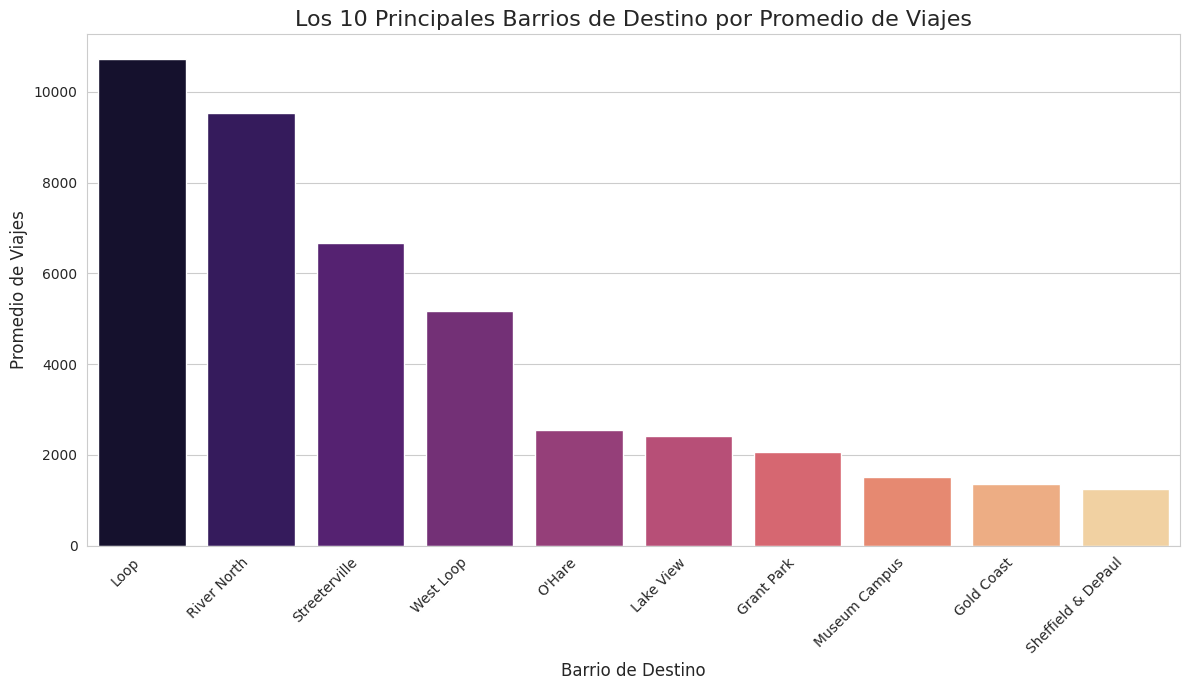

In [31]:
plt.figure(figsize=(12, 7))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_locations, palette='magma', hue='dropoff_location_name', legend=False)
plt.title('Los 10 Principales Barrios de Destino por Promedio de Viajes', fontsize=16)
plt.xlabel('Barrio de Destino', fontsize=12)
plt.ylabel('Promedio de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Conclusión del Gráfico de los 10 Principales Barrios de Destino

El gráfico de barras que muestra los 10 barrios de destino con mayor promedio de viajes revela patrones interesantes sobre la demanda de taxis en Chicago. A continuación, se presentan las conclusiones principales:

1.  **Concentración Urbana y de Negocios**: Los barrios del "Loop" y "River North" destacan como los destinos con el mayor promedio de viajes. Estas áreas son conocidas por ser centros de negocios, distritos financieros, centros comerciales y destinos turísticos clave en Chicago, lo que explica la alta demanda de transporte.
2.  **Destinos Turísticos y Recreativos**: Barrios como "Streeterville", "Grant Park" y "Museum Campus" también figuran prominentemente. Estas zonas albergan hoteles de lujo, atracciones culturales, museos y parques populares, lo que genera un flujo constante de visitantes que utilizan taxis.
3.  **Importancia de los Centros de Transporte**: "O'Hare" (refiriéndose al Aeropuerto Internacional O'Hare) ocupa un lugar significativo, lo que subraya la importancia de los aeropuertos como puntos de origen y destino de viajes en taxi, tanto para residentes como para turistas y viajeros de negocios.
4.  **Desigualdad en la Demanda**: Existe una clara disparidad en el promedio de viajes entre los barrios principales. Mientras que el "Loop" y "River North" superan significativamente los 9,000 viajes, barrios como "Gold Coast" y "Sheffield & DePaul" tienen promedios mucho más bajos, alrededor de los 1,200-1,300, lo que indica que la demanda está muy concentrada en unas pocas zonas.
5.  **Patrones de Movilidad Urbana**: Los datos sugieren que los viajes en taxi están fuertemente influenciados por la actividad económica, turística y de ocio. Las áreas con alta densidad de oficinas, comercio, y atracciones suelen ser los puntos finales más comunes para los trayectos en taxi.

### Conclusión del Gráfico de los 10 Principales Barrios de Destino

El gráfico de barras que muestra los 10 barrios de destino con mayor promedio de viajes revela patrones interesantes sobre la demanda de taxis en Chicago. A continuación, se presentan las conclusiones principales:

1.  **Concentración Urbana y de Negocios**: Los barrios del "Loop" y "River North" destacan como los destinos con el mayor promedio de viajes. Estas áreas son conocidas por ser centros de negocios, distritos financieros, centros comerciales y destinos turísticos clave en Chicago, lo que explica la alta demanda de transporte.
2.  **Destinos Turísticos y Recreativos**: Barrios como "Streeterville", "Grant Park" y "Museum Campus" también figuran prominentemente. Estas zonas albergan hoteles de lujo, atracciones culturales, museos y parques populares, lo que genera un flujo constante de visitantes que utilizan taxis.
3.  **Importancia de los Centros de Transporte**: "O'Hare" (refiriéndose al Aeropuerto Internacional O'Hare) ocupa un lugar significativo, lo que subraya la importancia de los aeropuertos como puntos de origen y destino de viajes en taxi, tanto para residentes como para turistas y viajeros de negocios.
4.  **Desigualdad en la Demanda**: Existe una clara disparidad en el promedio de viajes entre los barrios principales. Mientras que el "Loop" y "River North" superan significativamente los 9,000 viajes, barrios como "Gold Coast" y "Sheffield & DePaul" tienen promedios mucho más bajos, alrededor de los 1,200-1,300, lo que indica que la demanda está muy concentrada en unas pocas zonas.
5.  **Patrones de Movilidad Urbana**: Los datos sugieren que los viajes en taxi están fuertemente influenciados por la actividad económica, turística y de ocio. Las áreas con alta densidad de oficinas, comercio, y atracciones suelen ser los puntos finales más comunes para los trayectos en taxi.

## Tarea Final

### Subtask:
Resumir las conclusiones clave de los análisis y gráficos realizados para ambos datasets.


## Summary:

### Data Analysis Key Findings

*   **Data Loading and Structure**: Two datasets were successfully loaded: `df_trips_companies` (64 entries, 2 columns) and `df_trips_locations` (94 entries, 2 columns). No missing values were found, and all data types were appropriate for analysis.
*   **Highly Skewed Trip Distribution**: Both datasets exhibited highly skewed distributions:
    *   For taxi companies, the `trips_amount` had a mean of approximately 2145.48, but a median of only 178.50, indicating that a few companies handle a disproportionately high number of trips.
    *   For drop-off locations, `average_trips` showed a mean of 599.95 and a median of 52.02, suggesting that a small number of locations attract a significantly higher average number of taxi trips.
*   **Dominance in Taxi Company Market**:
    *   "Flash Cab" is the leading taxi company, significantly outperforming all others in terms of `trips_amount`.
    *   The top five companies ("Flash Cab", "Taxi Affiliation Services", "Medallion Leasing", "Yellow Cab", "Taxi Affiliation Service Yellow") concentrate a large portion of the total trips, indicating a highly concentrated, possibly oligopolistic, market structure.
*   **Key Drop-off Location Hotspots**:
    *   "Loop" (with 10727.47 average trips) and "River North" (with 9523.67 average trips) are the primary destinations for taxi trips, highlighting their importance as urban and business centers.
    *   Other significant destinations include tourist/recreational areas like "Streeterville" (6664.67 average trips) and "Grant Park" (2068.57 average trips), as well as major transportation hubs such as "O'Hare" (2546.67 average trips).
    *   Demand for taxi services is highly concentrated in these few key areas, largely driven by economic, tourist, and leisure activities.

### Insights or Next Steps

*   Taxi companies could leverage the identified high-demand drop-off locations to optimize driver deployment and service availability, especially in "Loop", "River North", and "O'Hare" areas, to maximize efficiency and customer satisfaction.
*   Further analysis could explore the correlation between the dominant taxi companies and the most popular drop-off locations to understand potential partnerships or service patterns, and investigate the time-based trends for both trip amounts and average trips to identify peak hours or seasonal variations.
